In [11]:
import torch as th
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from librosa import griffinlim, stft
from torchaudio.transforms import Spectrogram, GriffinLim

In [70]:
waveform = th.randn((12, 12256)).numpy()

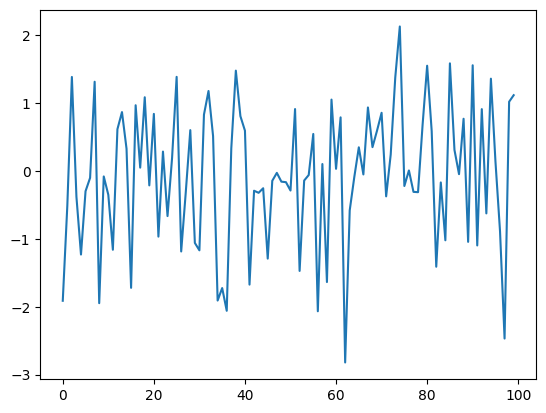

In [90]:
plt.plot(waveform[0, :100])

In [53]:
import timeit

In [54]:
def libr(x=waveform):
    spec = np.array([stft(xx[:12256], n_fft=256, hop_length=32) for xx in x])
    retspec = np.abs(spec[:, :-1])
    wave = np.array([griffinlim(rs, n_fft=256, hop_length=32, n_iter=128) for rs in np.abs(spec)])
    return retspec, wave

In [58]:
sp_fn = Spectrogram(256, hop_length=32, power=1, center=True, pad_mode="constant")
gl_fn = GriffinLim(256, 128, hop_length=32, power=1)

def ta(x=waveform):    
    spec = sp_fn(tx[:, :12256])
    retspec = spec[:, :-1]
    wave = gl_fn(spec)
    return retspec, wave

In [71]:
lib_spec, lib_wave = libr(waveform)

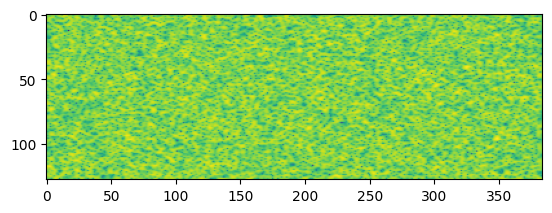

In [95]:
plt.imshow(np.log(lib_spec[0]))

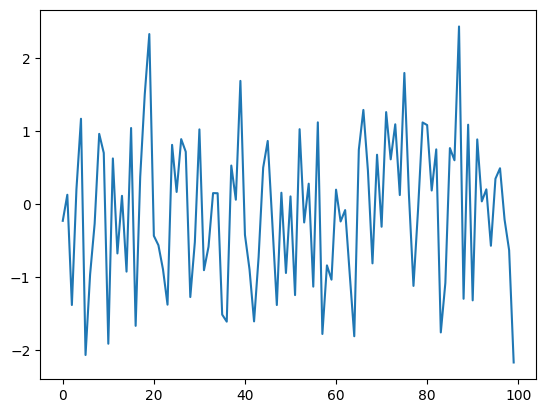

In [89]:
plt.plot(lib_wave[0, :100])

In [72]:
ta_spec, ta_wave = ta(waveform)

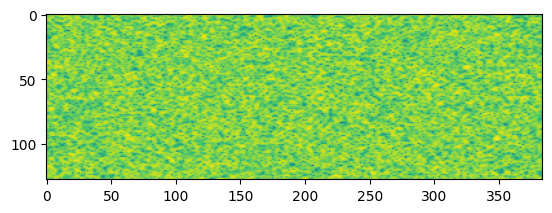

In [91]:
plt.imshow(np.log(ta_spec[0])

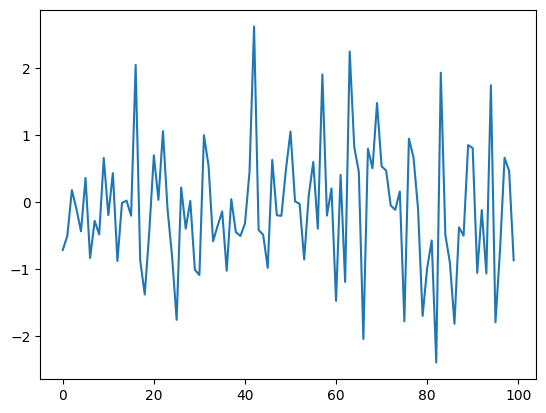

In [88]:
plt.plot(ta_wave[0, :100])

In [79]:
np.mean(np.abs(lib_spec- ta_spec.numpy()))

8.0202085e-07

In [81]:
np.mean(np.abs(lib_wave - ta_wave.numpy()))

1.1094923

In [78]:
lib_wave

array([[-0.22908315,  0.12714279, -1.3793752 , ...,  0.00362614,
        -0.87653667, -0.03227825],
       [ 0.12455233, -0.7820703 ,  0.02682195, ..., -1.81712   ,
         0.5495691 ,  0.08873887],
       [-0.21047679,  0.32908687, -0.1356605 , ..., -0.44709885,
         0.03065578, -0.635885  ],
       ...,
       [-0.6214707 ,  1.3190382 , -0.66795665, ...,  2.6693382 ,
         0.11706043, -0.5458781 ],
       [-0.4920249 , -0.37885943,  0.04311782, ..., -0.29696712,
         0.30427673, -0.82385004],
       [ 0.5512544 , -0.27539918,  0.15711296, ...,  0.27640516,
        -0.53412294,  0.76996964]], dtype=float32)

In [77]:
waveform

array([[-1.9122293 , -0.509284  ,  1.388115  , ...,  1.2176195 ,
         0.33839172, -0.00627089],
       [-0.6567415 , -0.12585935, -0.6164154 , ...,  0.3877724 ,
        -0.52771235,  2.0746691 ],
       [ 0.581859  , -0.487747  , -1.1445786 , ...,  0.8101999 ,
         0.2598114 , -0.5225193 ],
       ...,
       [ 0.8994978 , -0.40681973, -0.19879346, ..., -3.985005  ,
         0.42858663,  0.4129724 ],
       [ 0.01364473,  0.61944693,  0.79352903, ..., -0.21947077,
         0.68513894,  0.44300702],
       [ 1.9207028 , -0.51172066,  0.9113173 , ...,  0.22869863,
        -1.2001729 ,  0.5038819 ]], dtype=float32)

In [56]:
timeit.timeit(lambda: libr(), number=100)

227.8877420000499

In [59]:
timeit.timeit(lambda: ta(), number=100)

184.3877035418991

In [178]:
np.max(np.log(np.abs(spec)))

3.5753815

In [176]:
np.mean(np.abs(spec) - np.abs(spec2))

2.837122e-07

In [119]:
for g in range(390, 300, -1):    
    gr = g / 2**2 / 2**3
    if int(gr) == gr:
        print(g)
        print(g / 2**2)
        print(g / 2**2 / 2**3)
        break

384
96.0
12.0


In [120]:
grr = np.concatenate([spec, np.zeros_like(spec[:, :1])], axis=1)
np.array([griffinlim(wave, n_fft=256, hop_length=32) for wave in grr]).shape

(1, 12256)

In [78]:
grr.shape

(1, 129, 390)

In [82]:
128 // 4

32

In [85]:
390 / 8

48.75

In [81]:
2^3

1